# Week 2

As explained in the [Before week 1: How to take this class](https://nbviewer.jupyter.org/github/suneman/socialdata2021/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an IPython notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

Hint: And (as explained [here](https://nbviewer.jupyter.org/github/suneman/socialdata2021/blob/main/lectures/COVID-update-1.ipynb)) you can ask me - or any of the friendly Teaching Assistants - for help at any point if you get 
stuck!

**New Info**: Remember that this week is also the time to learn a bit about how the the assignments and the final project work. So if you havn't already, check out the [Before week 2: Assignments and Final Project](https://nbviewer.jupyter.org/github/suneman/socialdata2021/blob/main/lectures/Assignments_And_Final_Project.ipynb) notebook.

## Informal intro

Below is today's informal intro video. Since I can't give the intro to the class in person, I've recorded a little video that talks about what we'll be working on today. 

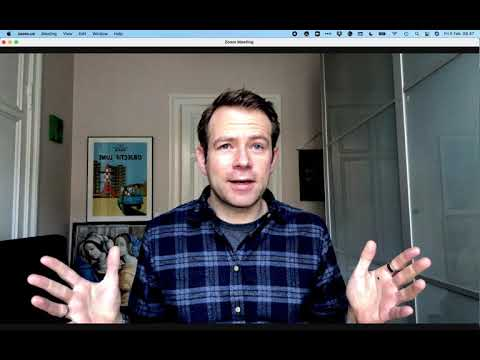

In [2]:
# short video explaining the plans
from IPython.display import YouTubeVideo
YouTubeVideo("VATfaGwNwjA",width=600, height=333)

## Overview

Today's lecture has 3 parts. 
* First we'll do a little data visualization exercise (which we'll come back to later in the semester). 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots. 
* Finally - in the last part - we'll play around with visualizing the geo-data contained in the CSV file.

## Part 1: A little visualization exercise


> *Exercise*: 
> 
> Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
> As you will later realize, these are famous datasets!
> Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  
>
> It's ok to just download these files to disk by right-clicking on each one, but if you use Python and _urllib_ or _urllib2_ to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
> * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this).


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own wikipedia page!!

And the video below generalizes in the coolest way imaginable. It's a treat, but don't watch it until **after** you've done the exercises - and read the wikipedia page.

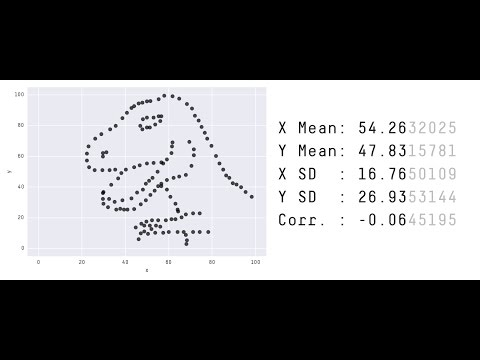

In [6]:
YouTubeVideo("DbJyPELmhJc",width=800, height=450)

## Part 2: Working with the dataset 

The exercises today will continue to focus on the data in the big CSV file. 

Let's start by think a bit more about the crime-data file from San Francisco that you downloaded last week. We'll again only look at the focus-crimes.

In [7]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
> Again, restrict yourself to the dataset of entire years 2013-2018.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercises*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's >neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes >that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. > That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/categoryhist.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
> ![Histograms](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/conditional.png "histograms")
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

**Comment**. Notice how much awesome datascience (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right?

## Part 3: Visualizing geodata with Plotly

So visualizing geodata used to be difficult (see [last year's exercise for details](https://nbviewer.jupyter.org/github/suneman/socialdataanalysis2020/blob/master/lectures/Week2.ipynb)), but with `Plotly` things have gotten easier. 

Like matplotlib, Plotly is an [open-source data visualization library](https://plotly.com/python/), but it's aimed at making interactive visualizations that can be rendered in a web browser (or jupyter notebook). You can get read about it and learn how to install it [here](https://plotly.com/python/getting-started/).

That means that we can easily draw on the fact that the crime data has lots of exciting geo-data attached. We'll take our inspiration from Plotly's gentle intro to Choropleth maps: https://plotly.com/python/mapbox-county-choropleth/

The thing we want to look into is the SF police districts, shown below (image stolen from [this page](https://hoodline.com/2015/07/citywide-sfpd-redistricting-to-take-effect-sunday/)).

![districts from web](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/sfpdfinal.png)

But because we are cool programmers, we want to create our own maps, **with our own information on them**. Thus, today's last exercise is about creating our own maps.

> *Exercise 3a*: Let's plot a map with some random values in it.
>
> What we need to do to get going is to create some random data. Below is a little dictionary with a random value for each district that you can use if you want your plots to look like mine.

In [2]:
randomdata = {'CENTRAL': 0.8903601342256143,
 'SOUTHERN': 0.8642882941363439,
 'BAYVIEW': 0.925634097746596,
 'MISSION': 0.7369022697287458,
 'PARK': 0.9864113307070926,
 'RICHMOND': 0.5422239624697017,
 'INGLESIDE': 0.5754056712571605,
 'TARAVAL': 0.5834730737348696,
 'NORTHERN': 0.08148199528212985,
 'TENDERLOIN': 0.37014287986350447};

> *Exercise 3a* continued:
>
> In addition to some data, we also need some *shape-files*. Those are the outlines of each area. 
> The map we're going to be creating is called a **[choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)** (more on these later), which is basically a map, where we color in the shapefiles based on some value that we care about.
> For this exercise, we'll juse use the random values above.
>
> [Shapefiles can have many different formats](https://en.wikipedia.org/wiki/Shapefile), but because I'm a brilliant teacher and an all-round standup person, I'm sharing the shapefiles as [`geojson`](https://en.wikipedia.org/wiki/GeoJSON), which is an easy-to-use format for shapefiles based on `json`.
>
> * Download the SFPD District shapefiles **[here](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/sfpd.geojson)**
> * Now that you have the shapefiles, you can follow the example here: https://plotly.com/python/mapbox-county-choropleth/ but with the following modifications
>    * In the example the `id` is a so-called FIPS code. In our case the `id` is the `DISTRICT`
>    * You will have to convert the dictionary of random values I included above to a Pandas dataframe with the right column headings.
>    * The data used in the example has a range between zero and 12. Your data is between $[0,1]$. So you'll need to modify the plotting command to accound for that change.
>    * You should also change the map to display the right zoom level.
>    * And the map should center on San Francisco's `lat` and `lon`.
> * Now you can create your map.

Mine looks something like this.

![map_example.png](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/map_example.png)

You're encouraged to play around with other settings, color schemes, etc.

> *Exercise 3b:* But it's crime-data. Let's do something useful and **visualize where it is safest to leave your car on a Sunday**.
> 
> Take a moment to congratulate yourself. You now know how to create cool plots!
> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * To create the plot, remember that your range of data-values is different from before, so you'll have to change the plotly command a bit.
> * **Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?**
> *Try this for Extra credit:*
> * Create plots for the same crime type, but different days -> comment on the results